<a href="https://colab.research.google.com/github/lewinskie254/eda/blob/main/EDA_For_Dummies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('http://ishelp.info/data/insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [35]:
df_age_19_male = df[(df['sex'] == 'male') & (df['age'] ==20)]
len(df_age_19_male)

15

In [36]:
from collections import Counter

counter = Counter(df_age_19_male['region'])
print(counter)

Counter({'northwest': 4, 'southwest': 4, 'northeast': 4, 'southeast': 3})


In [41]:
stats.mode(df['age'])

ModeResult(mode=np.int64(18), count=np.int64(69))

In [43]:
len(df[df['age'] == 18])

69

In [44]:
df.shape

(1338, 7)

In [49]:
np.min(df.charges)

1121.8739

In [50]:
lowest = df[df['charges'] == np.min(df.charges)]
lowest

,age,sex,bmi,children,smoker,region,charges
940,18,male,23.21,0,no,southeast,1121.8739


In [57]:
regions = df.region.unique()
regions

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [58]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [59]:
data = list(df.columns)
data

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [60]:
dicto = {i: df[i].nunique() for i in data}

In [61]:
dicto

{'age': 47,
 'sex': 2,
 'bmi': 548,
 'children': 6,
 'smoker': 2,
 'region': 4,
 'charges': 1337}

In [65]:
dicto_dtype = {i: df[i].dtype for i in data}

In [63]:
dicto_dtype

{'age': dtype('int64'),
 'sex': dtype('O'),
 'bmi': dtype('float64'),
 'children': dtype('int64'),
 'smoker': dtype('O'),
 'region': dtype('O'),
 'charges': dtype('float64')}

In [68]:
dicto_unique = {i: len(df[i].unique()) for i in data}

In [69]:
dicto_unique

{'age': 47,
 'sex': 2,
 'bmi': 548,
 'children': 6,
 'smoker': 2,
 'region': 4,
 'charges': 1337}

In [73]:
from pandas.api import types as ptypes

dict_api = {
    col: 'numeric' if ptypes.is_numeric_dtype(df[col])
         else 'categorical' if ptypes.is_categorical_dtype(df[col]) or ptypes.is_object_dtype(df[col])
         else 'other'
    for col in df.columns
}

dict_api


/tmp/ipython-input-58099680.py:5: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  else 'categorical' if ptypes.is_categorical_dtype(df[col]) or ptypes.is_object_dtype(df[col])


{'age': 'numeric',
 'sex': 'categorical',
 'bmi': 'numeric',
 'children': 'numeric',
 'smoker': 'categorical',
 'region': 'categorical',
 'charges': 'numeric'}

In [74]:
data_null = {i: df[i].isnull().sum() for i in df.columns}

In [75]:
data_null

{'age': np.int64(0),
 'sex': np.int64(0),
 'bmi': np.int64(0),
 'children': np.int64(0),
 'smoker': np.int64(0),
 'region': np.int64(0),
 'charges': np.int64(0)}

In [90]:
percentiles = [i*10 for i in range(11)]
values= np.percentile(df['charges'], percentiles)

In [95]:
dict_ranges = {i: len(df[df['charges'] <= i]) for i in values}

In [96]:
dict_ranges

{np.float64(1121.8739): 1,
 np.float64(2346.5336150000003): 134,
 np.float64(3991.5757200000003): 268,
 np.float64(5484.84677): 402,
 np.float64(7369.052730000001): 535,
 np.float64(9382.033): 669,
 np.float64(11399.85716): 803,
 np.float64(13767.875345): 936,
 np.float64(20260.626406000003): 1070,
 np.float64(34831.7197): 1204,
 np.float64(63770.42801): 1338}

In [101]:
items = [i for i in range(len(values))]

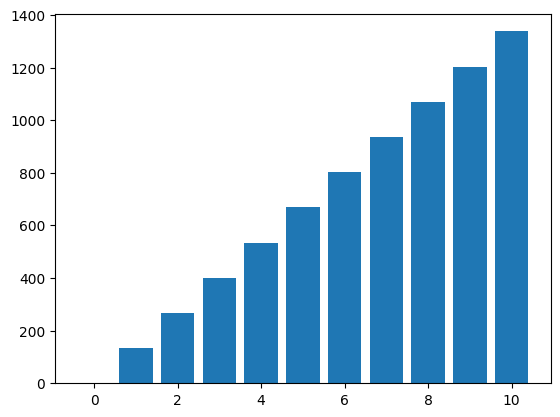

In [102]:
plt.bar(items, dict_ranges.values())
plt.show()

In [103]:
df.age

,age
0,19
1,18
2,28
3,33
4,32
...,...
1333,50
1334,18
1335,18
1336,21


In [104]:
df.age.unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [106]:
df.age.min()

18

In [107]:
df.age.max()

64

In [113]:
64-18

46

In [114]:
46/10

4.6

In [117]:
list_of_ages = [i for i in range(18, 70, 5)]
list_of_ages

[18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68]

In [121]:
mean_per_age_group = {f"({list_of_ages[i]} - {list_of_ages[i+1]})" : df[df['age'] < list_of_ages[i+1]]['charges'].mean() for i in range(len(list_of_ages)-1)}

In [122]:
mean_per_age_group

{'(18 - 23)': np.float64(8375.014415175676),
 '(23 - 28)': np.float64(9098.19224795304),
 '(28 - 33)': np.float64(9431.709042050301),
 '(33 - 38)': np.float64(10174.583708123397),
 '(38 - 43)': np.float64(10300.814054727152),
 '(43 - 48)': np.float64(11253.919369820313),
 '(48 - 53)': np.float64(11828.641135960577),
 '(53 - 58)': np.float64(12363.015804769168),
 '(58 - 63)': np.float64(12982.527724469452),
 '(63 - 68)': np.float64(13270.422265141257)}

In [130]:
mean_per_age_group.values()

dict_values([np.float64(8375.014415175676), np.float64(9098.19224795304), np.float64(9431.709042050301), np.float64(10174.583708123397), np.float64(10300.814054727152), np.float64(11253.919369820313), np.float64(11828.641135960577), np.float64(12363.015804769168), np.float64(12982.527724469452), np.float64(13270.422265141257)])

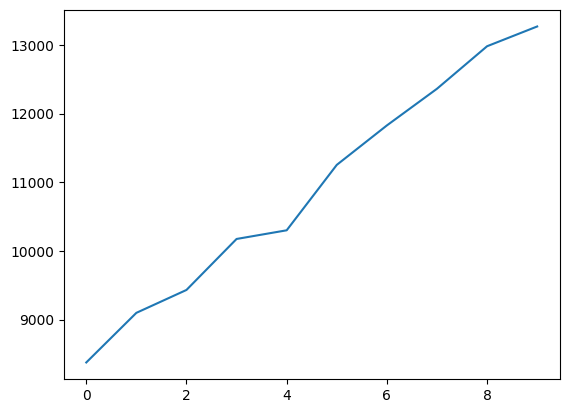

In [131]:
plt.plot(mean_per_age_group.values())

<BarContainer object of 10 artists>

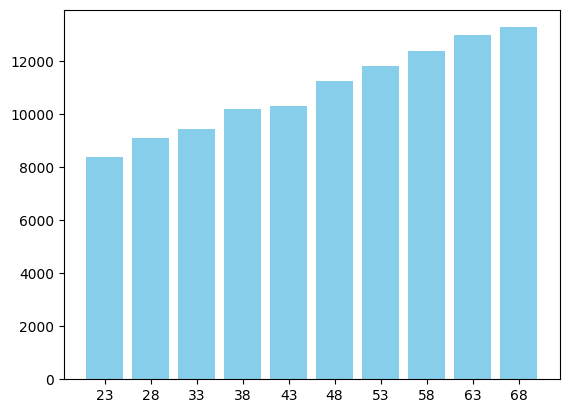

In [135]:
plt.bar([str(list_of_ages[i]) for i in range(1, len(list_of_ages))], mean_per_age_group.values(), color='skyblue')